In [13]:
#Lets first load the data csv file into a pandas dataframe
import pandas as pd
import csv

#df = pd.read_csv('insurance_claims_cleaned.csv')

# Read in strict mode
df = pd.read_csv("insurance_claims_cleaned.csv", dtype=str, quoting=csv.QUOTE_ALL)

# Clean stray spaces/commas
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

# Export with consistent quoting
df.to_csv("insurance_claims_cleaned_fixed.csv", index=False, quoting=csv.QUOTE_ALL)

I will initiallly do fraud reported EDA based on Claim Types

Lets get some descriptive statistics on claims data. Vehicle Claims, Injury Claim, Property Claim, and Total Claim Amount and compare cases where fraud was reported vs not reported

In [10]:
#lets get some initial descriptive statistics on claim amounts based on fraud reported
print(df.groupby('fraud_reported')[['vehicle_claim', 'injury_claim', 'property_claim', 'total_claim_amount']].describe())

               vehicle_claim                    injury_claim                  \
                       count unique    top freq        count unique top freq   
fraud_reported                                                                 
No                       753    577   5040    7          753    525   0   16   
Yes                      247    223  52080    3          247    217   0    9   

               property_claim                 total_claim_amount         \
                        count unique top freq              count unique   
fraud_reported                                                            
No                        753    518   0   13                753    612   
Yes                       247    211   0    6                247    225   

                            
                  top freq  
fraud_reported              
No               2640    4  
Yes             75400    3  


# Fraud vs. Non-Fraud Claim Statistics

The following summarizes **claim-related features** grouped by `fraud_reported`.

---

## 🚗 Vehicle Claim
- **Non-Fraud (N)**  
  - Mean: ~36.1K  
  - Median: 41.2K  
  - Range: 70 → 79.5K  
  - Distribution: wider spread, includes very small claims.  

- **Fraud (Y)**  
  - Mean: ~43.5K  
  - Median: 44.8K  
  - Range: 2K → 77.8K  
  - Distribution: narrower, clusters mid-range (37K–52K).  

**Insight:** Fraud cases push vehicle claims higher on average, but within believable ranges.  

---

## 🩺 Injury Claim
- **Non-Fraud (N)**  
  - Mean: ~7.2K  
  - Median: 7.2K  
  - Range: 0 → 20.7K  

- **Fraud (Y)**  
  - Mean: ~8.2K  
  - Median: 7.3K  
  - Range: 0 → 20.7K  

**Insight:** Fraud cases inflate injury claims slightly (higher mean), but both groups overlap heavily.  

---

## 🏠 Property Claim
- **Non-Fraud (N)**  
  - Mean: ~6.9K  
  - Median: 6.7K  
  - Range: 100 → 23.7K  

- **Fraud (Y)**  
  - Mean: ~8.6K  
  - Median: 7.4K  
  - Range: 0 → 21.8K  

**Insight:** Fraud cases tend to claim more property damage on average, with fewer very small payouts.  

---

## 💰 Total Claim Amount
- **Non-Fraud (N)**  
  - Mean: ~50.3K  
  - Median: 56.5K  
  - Range: 100 → 114.9K  

- **Fraud (Y)**  
  - Mean: ~60.3K  
  - Median: 61.3K  
  - Range: 2.9K → 112.3K  

**Insight:** Fraud cases consistently show **larger total claims**, clustering mid-to-high (50K–73K), while non-fraud cases have more small claims.  

---

## 📌 Overall Pattern
- Fraud reports are **consistently higher across all claim types** (vehicle, injury, property, total).  
- Fraud clusters in **mid-to-high ranges**, avoiding extremes.  
- Non-fraud includes more **very low claims**, which fraudsters seem to avoid.  

---



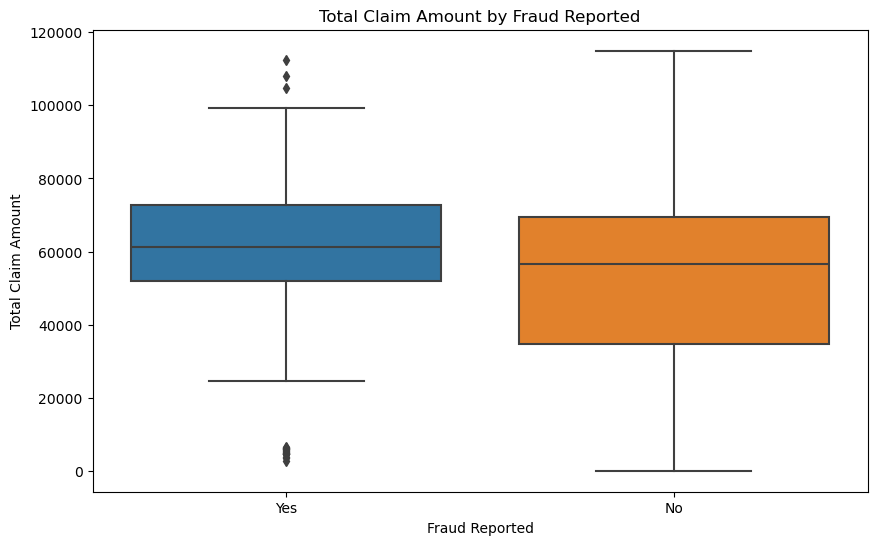

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
#Lets compare fraud to non-fraud cases for the variable 'total_claim'
df['total_claim_amount'] = pd.to_numeric(df['total_claim_amount'], errors='coerce')
plt.figure(figsize=(10,6))
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=df)
plt.title('Total Claim Amount by Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Total Claim Amount')
plt.show()

Median total claim is slightly higher for fraud (Y) vs non-fraud (N).
Fraud cases appear more tightly clustered (narrower IQR) while non-fraud has a wider spread and a larger upper whisker (~115k).
There are very small/zero total_claim_amount values in N (and a few low outliers in Y) — verify those as possible data issues.

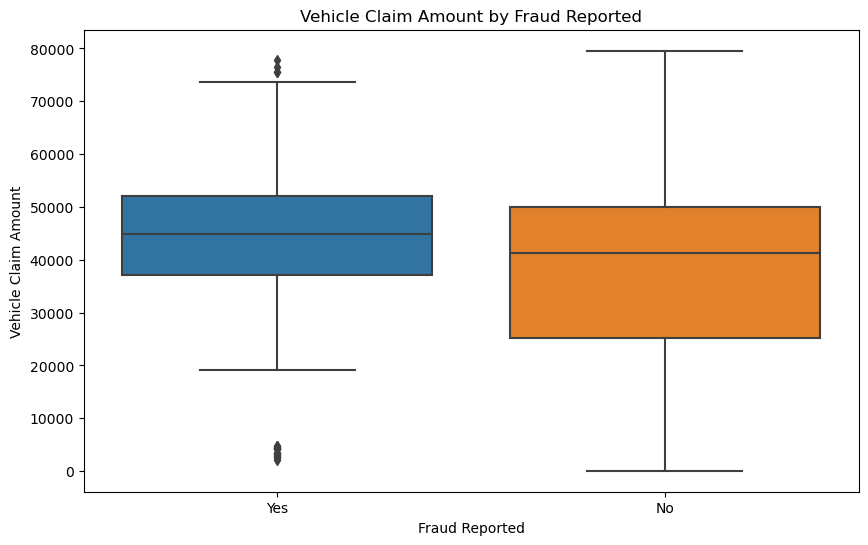

In [15]:
#Lets compare fraud to non-fraud cases for first, the variable 'vehicle_claim'
# Ensure 'vehicle_claim' is numeric
df['vehicle_claim'] = pd.to_numeric(df['vehicle_claim'], errors='coerce')
plt.figure(figsize=(10,6))
sns.boxplot(x='fraud_reported', y='vehicle_claim', data=df)
plt.title('Vehicle Claim Amount by Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Vehicle Claim Amount')
plt.show()

Fraud cases are more tightly clustered around mid-claims (30K–55K), while non-fraud spans a much wider range.

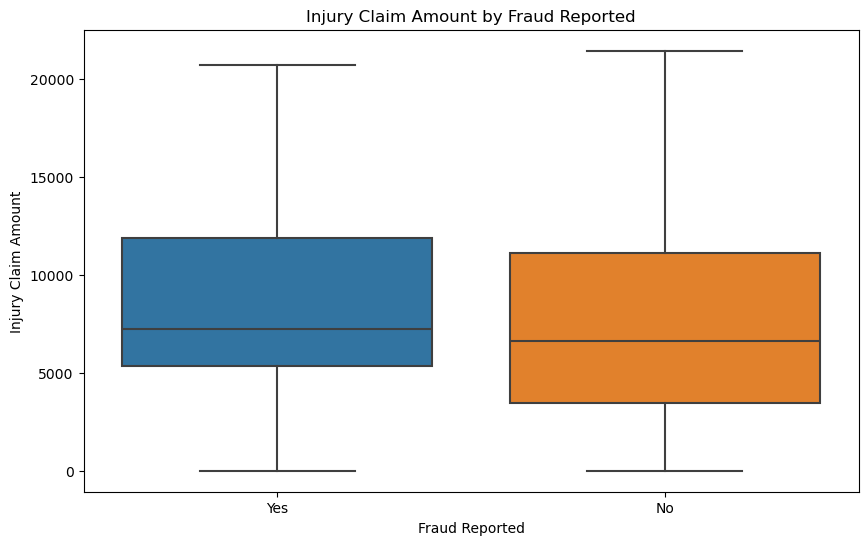

In [ ]:
#Lets take a look at fraud vs non-fraud for injury_claim
plt.figure(figsize = (10,6))
sns.boxplot(x= 'fraud_reported', y='injury_claim', data=df)
plt.title('Injury Claim Amount by Fraud Reported')
plt.xlabel ('Fraud Reported')
plt.ylabel ('Injury Claim Amount')
plt.show()

Just like with vehicle claims, fraudsters aim for moderately high, not extreme, amounts → enough to get paid but not so much it looks suspicious.

Injury claims in fraud cases rarely drop to the very small payouts that you see in genuine claims.

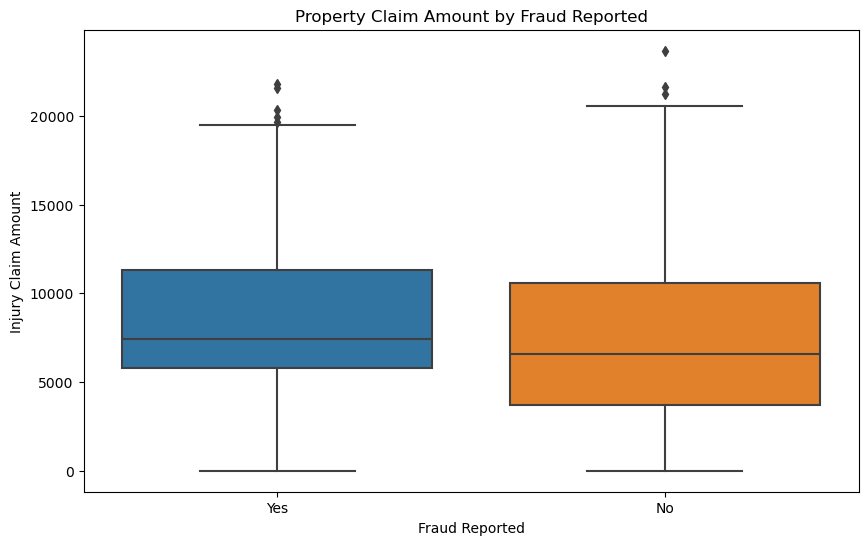

In [ ]:
#Lets take a look at fraud vs non-fraud for property_claim
plt.figure(figsize = (10,6))
sns.boxplot(x= 'fraud_reported', y='property_claim', data=df)
plt.title('Property Claim Amount by Fraud Reported')
plt.xlabel ('Fraud Reported')
plt.ylabel ('Injury Claim Amount')
plt.show()

Fraud again clusters in the mid-range (~7.5K vs ~6.5K). Non-fraud includes more very low payouts.



## 📌 Overall Pattern
Across all three claim types:  
- Fraud tends to **cluster in mid-range values** → large enough to profit but not so large that it looks suspicious.  
- Non-fraud includes a broader distribution, especially more very small claims.  

---

## ✅ Next Steps (Put into modeling file...)
1. Run **statistical tests** (e.g., Mann–Whitney U) to check if differences in medians are significant.  
2. Explore **ratios** (e.g., claim amount ÷ annual premium) as potential predictive features.  
3. Extend analysis to **total_claim_amount** and categorical features (occupation, education, incident type).  
4. Use findings to engineer fraud-detection rules or features for modeling.  


# Mann–Whitney U Test

## 🔎 What it is
- A **non-parametric statistical test** for comparing **two independent groups**.  
- Tests whether one group tends to have **systematically higher or lower values** than the other.  
- Works by ranking values from both groups and comparing rank sums.  
- Unlike the t-test, it **does not assume normality** or equal variance.  

---

## ✅ Why use it here
- Insurance claim amounts are **skewed and non-normal**.  
- Fraud and non-fraud groups have **different spreads and outliers**.  
- A t-test would be invalid under these conditions, but Mann–Whitney U handles them.  
- Useful for verifying whether claim amounts (vehicle, injury, property, total) differ significantly between fraud and non-fraud cases.  

---

## 🏦 Benefits
1. Robust to skewed data and outliers.  
2. Detects whether fraud claims are **consistently higher/lower** than non-fraud.  
3. Supports **feature selection** for machine learning — if distributions differ significantly, the feature is valuable for prediction.  

---
